In [1]:
import sys 
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx 
import nxviz as nv

from Leviathan.Island_mdp import Island
from Leviathan.Member_mdp import Member
from Leviathan.Analyzer import Analyzer
from time import time
from Leviathan.Land_mdp import Land
from utils import save
import os

rng = np.random.default_rng()
island = Island(200, (20, 20), 2022)
# island = Island.load_from_pickle("data/Nov/15_13-23/180.pkl")

/Users/Harry/opt/miniconda3/envs/arm30/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
path = save.datetime_dir("../data")
# path = dir+"test_run/"
# os.mkdir(path)
Island._RECORD_PERIOD = 10

Current save directory: ../data/May/03_14-50/


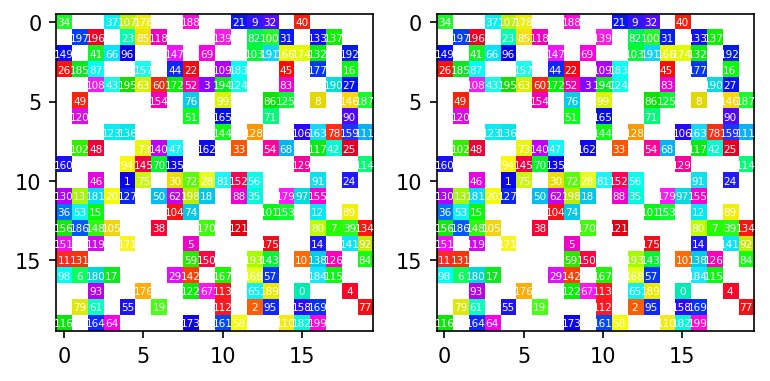

In [3]:
island.land.plot()

In [5]:
for i in range(20):
    island.new_round(record_path=path)
    island.trade()
    island.land_distribute()
    island.colonize()
    island.consume()
    island.fight()
    island.produce()
    island.reproduce()

    if island.is_dead:
        break


In [6]:
attack_record_list = island.record_historic_ratio_list[:,0]

q1 = np.percentile(attack_record_list, 25)
q2 = np.percentile(attack_record_list, 50)
q3 = np.percentile(attack_record_list, 75)
q4 = np.percentile(attack_record_list, 100)

q1, q2, q3, q4

(0.0, 0.0, 0.5687228351273481, 1.1374456702546962)

## Analyze

##################### 20 #####################
===================== 攻击 =====================
	Song(63) --25.6-> Taheerah(246)
	Song(63) --29.8-> Shanka(247)
	Drew(72) --30.8-> Alysse(70)
	Drew(72) --33.1-> Jerime(243)
	Drew(72) --35.5-> Mellisa(242)
	Drew(72) --20.2-> Edrick(224)
	Drew(72) --36.8-> Takecia(251)
	Anastassia(26) --22.2-> Shanka(247)
	Anastassia(26) --18.1-> Janiqua(225)
	Javonte(234) --34.8-> Teandra(71)
	Javonte(234) --42.7-> Jeneen(125)
	Chenoa(37) --15.8-> Jacqulene(79)
	Chenoa(37) --14.4-> Davian(178)
	Chenoa(37) --13.5-> Ashey(249)
	Shaneaka(161) --47.9-> Amjad(214)
	Chandelle(255) --23.6-> Lakara(256)
	Chandelle(255) --15.6-> Wilhemina(157)
	Chandelle(255) --45.2-> Edrick(224)
	Javonte(234) --81.2-> Alishia(227)
	Javonte(234) --45.4-> Dessie(244)
	Javonte(234) --72.6-> Maya(8)
	Javonte(234) --81.8-> Latoiya(9)
	Javonte(234) --35.8-> Hasan(139)
	Javonte(234) --25.6-> Marlow(229)
	Shirita(58) --42.0-> Arnisha(4)
	Shirita(58) --41.9-> Chassity(252)
	Shirita(58) --39.

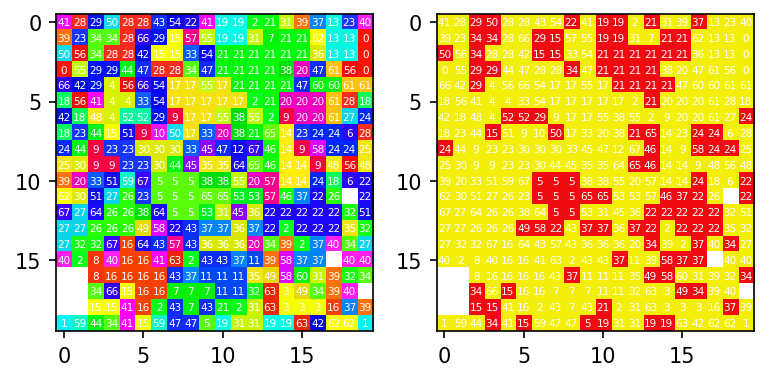

In [11]:
island.print_status(action=True)
island.land.plot()

In [23]:
import random

def decision(params, status):
  # function to make random decisions based on parameters and status
  if random.random() < params[0]:
    return 'attack'
  else:
    return 'help'

def update_status(a, b, decision_a, decision_b):
  # function to update the status of two agents based on their decisions
  if decision_a == 'attack':
    b -= 1
  if decision_b == 'attack':
    a -= 1
  return a, b

def reproduce(params_a, params_b):
  # function to produce new parameters for the offspring
  return (params_a + params_b)/2

# Initialize population with random strategies and random status
population = [(random.random(), random.randint(1, 10)) for i in range(10)]

# simulate for 100 rounds
for i in range(100):
  next_generation = []
  for j in range(0, len(population), 2):
    # make decisions based on parameters and status
    decision_a = decision(*population[j])
    decision_b = decision(*population[j+1])
    # update status based on decisions
    population[j] = update_status(*population[j], decision_a, decision_b)
    population[j+1] = update_status(*population[j+1], decision_b, decision_a)
    # generate offspring
    offspring_params = reproduce(population[j][0], population[j+1][0])
    next_generation.append((offspring_params, (population[j][1] + population[j+1][1])/2))
  population = next_generation


TypeError: 'float' object is not subscriptable

In [18]:
mem11 = island.current_members[1]

In [11]:
def print_sur_id(mem_list):
    sur_id = [mem.surviver_id for mem in mem_list]
    print(sur_id)

def get_pos(mem_list):
    pos = []
    for mem in mem_list:
        for p in mem.owned_land:
            pos.append(p)
    return pos

def assign_color(rgb_map, pos_list, rgb_color):
    """
    rgb_map has shape (land_x, land_y, 3)
    """
    for pos in pos_list:
        rgb_map[pos + (slice(None),)] = rgb_color
    
    return rgb_map

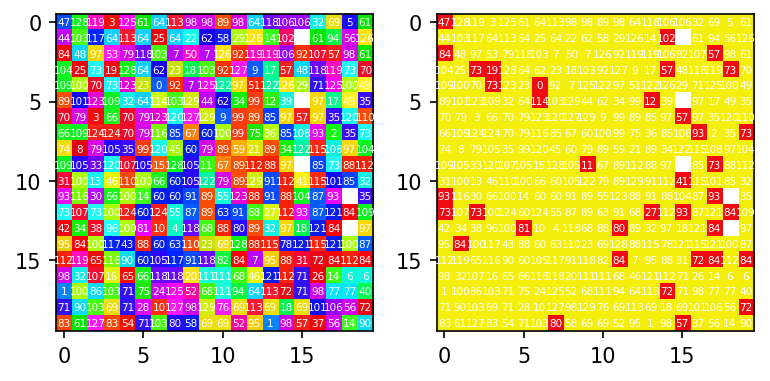

In [16]:
island.land.plot()

island._get_neighbors(mem11)
# print_sur_id(mem11.current_clear_list)
# print(mem11.current_empty_loc_list)
if mem11.current_neighbor_blocked_list != []:
    _, neibor_block = zip(*mem11.current_neighbor_blocked_list)
    print_sur_id(neibor_block)
# print_sur_id(mem11.current_self_blocked_list)

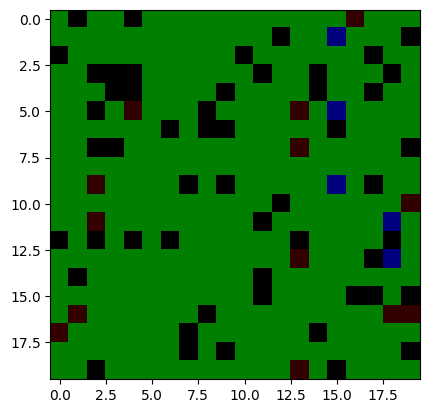

In [19]:
rgb_map = np.zeros((island.land.shape + (3,)))

rgb_map = assign_color(rgb_map, mem11.owned_land, np.array(mem11._color) / 256)
rgb_map = assign_color(rgb_map, get_pos(mem11.current_clear_list), [0.0, 0.5, 0])
rgb_map = assign_color(rgb_map, get_pos(mem11.current_self_blocked_list), [0.5, 0.0, 0])
if mem11.current_neighbor_blocked_list != []:
    rgb_map = assign_color(rgb_map, get_pos(neibor_block), [0.2, 0.0, 0])
rgb_map = assign_color(rgb_map, mem11.current_empty_loc_list, [0, 0, 0.5])


plt.imshow(rgb_map)
plt.show()

In [46]:
mem11.current_neighbor_blocked_list

[(Davena(206), Evelia(294)),
 (Zoraida(275), Evelia(294)),
 (Len(231), Evelia(294)),
 (Kong(254), Aleka(296)),
 (Norma(269), Aleka(296)),
 (Taheerah(246), Aleka(296)),
 (Jecory(267), Evelia(294)),
 (Drew(72), Evelia(294)),
 (Angella(282), Evelia(294)),
 (Dominik(260), Evelia(294)),
 (Iyona(288), Aleka(296)),
 (Sameul(261), Aleka(296)),
 (Benjain(253), Aleka(296)),
 (Amjad(214), Aleka(296)),
 (Javonte(234), Aleka(296)),
 (Javonte(234), Evelia(294)),
 (Kjersten(51), Evelia(294)),
 (Minette(162), Aleka(296)),
 (Ruthy(293), Evelia(294)),
 (Drew(72), Aleka(296)),
 (Terriann(291), Aleka(296)),
 (Aarn(280), Aleka(296)),
 (Zoraida(275), Aleka(296))]

In [53]:
ana = Analyzer(island)
ana.clear_graph()

In [54]:
island.current_members

[Anastassia(26),
 Chenoa(37),
 Kjersten(51),
 Shirita(58),
 Song(63),
 Drew(72),
 Phoenicia(106),
 Edelmiro(122),
 Mrk(131),
 Tavon(145),
 Lavina(147),
 Shaneaka(161),
 Minette(162),
 Ramie(201),
 Davena(206),
 Jaffar(207),
 Amjad(214),
 Edrick(224),
 Janiqua(225),
 Marlow(229),
 Len(231),
 Javonte(234),
 Stefania(238),
 Taheerah(246),
 Yee(248),
 Kineta(250),
 Benjain(253),
 Kong(254),
 Chandelle(255),
 Ji(257),
 Errick(258),
 Dominik(260),
 Sameul(261),
 Shenika(262),
 Mareesa(263),
 Ronald(264),
 Daphne(265),
 Alysa(266),
 Jecory(267),
 Shannan(268),
 Norma(269),
 Abdulaziz(270),
 Kayvon(271),
 Antwaine(272),
 Shanne(273),
 Weldon(274),
 Zoraida(275),
 Jevon(276),
 Willam(277),
 Aaran(278),
 Rattana(279),
 Aarn(280),
 Can(281),
 Angella(282),
 Aadil(283),
 Chalon(284),
 Everson(285),
 Rindi(286),
 Sherrika(287),
 Iyona(288),
 Jace(289),
 Sevag(290),
 Terriann(291),
 Kailani(292),
 Ruthy(293),
 Evelia(294),
 Sioban(295),
 Aleka(296)]

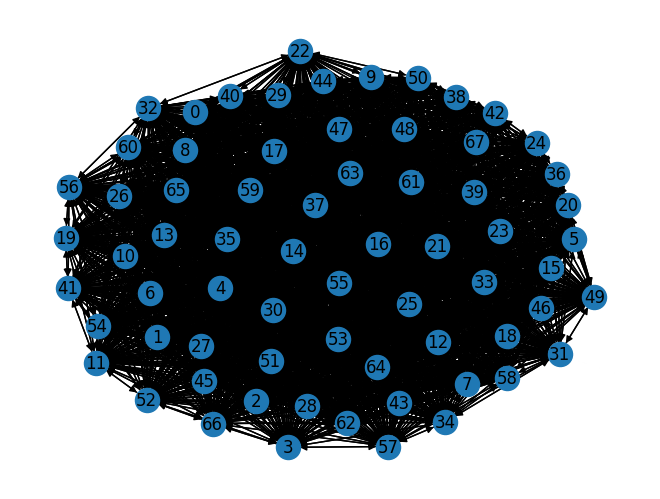

In [55]:
nx.draw(ana.clear_graph, with_labels=True)
plt.show()

In [56]:
island.all_members[2].surviver_id

In [57]:
island.new_round()
island.consume()
island.print_status()


##################### 21 #####################
本轮出生：[]
本轮死亡：[]
本轮总给予：0.0
本轮总攻击：0.0
本轮总产量：0.0
本轮总消耗：1044.8
	 ID Sur_ID  姓名          年龄   血量    仓库    土地数
	[26, 0] Anastassia:   67,   33.0,   0.0   4(1.0%)
	[37, 1] Chenoa:       46,   25.9,   0.0   2(0.5%)
	[51, 2] Kjersten:     69,   33.2,   0.0   9(2.2%)
	[58, 3] Shirita:      38,   31.3,   0.0   4(1.0%)
	[63, 4] Song:         46,   38.3,   0.0   4(1.0%)
	[72, 5] Drew:         36,   42.2,   0.0   9(2.2%)
	[106, 6] Phoenicia:    50,   42.9,   0.0   2(0.5%)
	[122, 7] Edelmiro:     38,   33.1,   0.0   5(1.2%)
	[131, 8] Mrk:          59,   21.8,   0.0   2(0.5%)
	[145, 9] Tavon:        31,   33.2,   0.0   8(2.0%)
	[147, 10] Lavina:       49,   21.0,   0.0   1(0.2%)
	[161, 11] Shaneaka:     65,   38.6,   0.0   6(1.5%)
	[162, 12] Minette:      48,   20.3,   0.0   1(0.2%)
	[201, 13] Ramie:        19,   46.3,   0.0   5(1.2%)
	[206, 14] Davena:       19,   47.1,   0.0   6(1.5%)
	[207, 15] Jaffar:       19,   43.8,   0.0   8(2.0%)
	[214, 16] Amjad

In [58]:
morgen = island.member_by_name("Morgen")

In [59]:
island._get_neighbors(morgen)

In [60]:
morgen.current_empty_loc_list

[]

In [61]:
boy.owned_land

NameError: name 'boy' is not defined

In [62]:
island._discard_land(marv, (1, 1))

NameError: name 'marv' is not defined

In [63]:
island.land

array([[Abdulaziz(270), Chandelle(255), Ji(257), Rattana(279),
        Chandelle(255), Chandelle(255), Antwaine(272), Aadil(283),
        Stefania(238), Abdulaziz(270), Marlow(229), Marlow(229),
        Kjersten(51), Javonte(234), Dominik(260), Shannan(268),
        Alysa(266), Ramie(201), Taheerah(246), Norma(269)],
       [Shannan(268), Taheerah(246), Mareesa(263), Mareesa(263),
        Chandelle(255), Sioban(295), Ji(257), Jaffar(207), Rindi(286),
        Chalon(284), Marlow(229), Marlow(229), Dominik(260),
        Edelmiro(122), Javonte(234), Javonte(234), Terriann(291),
        Ramie(201), Ramie(201), Anastassia(26)],
       [Rattana(279), Everson(285), Mareesa(263), Chandelle(255),
        Chandelle(255), Kayvon(271), Jaffar(207), Jaffar(207),
        Shenika(262), Aadil(283), Javonte(234), Javonte(234),
        Javonte(234), Javonte(234), Javonte(234), Javonte(234),
        Daphne(265), Ramie(201), Ramie(201), Anastassia(26)],
       [Anastassia(26), Chalon(284), Ji(257), Ji(257

In [67]:
rng.choice(range(10), 3, replace=False)

array([7, 8, 1])

In [68]:
m1 = Member("1", id=1, surviver_id=0, rng=rng)
m2 = Member("2", id=2, surviver_id=0, rng=rng)
m3 = Member("3", id=3, surviver_id=0, rng=rng)
m4 = Member("4", id=4, surviver_id=0, rng=rng)
m5 = Member("5", id=5, surviver_id=0, rng=rng)
m6 = Member("6", id=6, surviver_id=0, rng=rng)
m7 = Member("7", id=7, surviver_id=0, rng=rng)
m8 = Member("8", id=8, surviver_id=0, rng=rng)

In [69]:
land = Land((6, 5))
land.owner = [
    [None, m1, m1, None, m1],
    [m1, m1, m3, m5, m5],
    [m6, m6, m4, m4, m1],
    [m7, m1, None, m1, m1],
    [m1, m1, m1, m1, m1],
    [m4, m8, m2, m1, m1],
]

In [70]:
clear_list = []
self_blocked_list = []
neighbor_blocked_list = []
empty_loc_list = []

is_passed = np.zeros((6, 5))

land._find_neighbors(
    clear_list,
    self_blocked_list,
    neighbor_blocked_list,
    empty_loc_list,
    location = (2, 2),
    member = m4,
    is_passed = is_passed,
    iteration_cnt = 0,
    island = None
)

print(is_passed)
print(clear_list)
print(self_blocked_list)
print(neighbor_blocked_list)

land._find_neighbors(
    clear_list,
    self_blocked_list,
    neighbor_blocked_list,
    empty_loc_list,
    location = (5, 0),
    member = m4,
    is_passed = is_passed,
    iteration_cnt = 0,
    island = None
)

print(is_passed)
print(clear_list)
print(self_blocked_list)
print(neighbor_blocked_list)
print(empty_loc_list)

TypeError: Land._find_neighbors() missing 1 required positional argument: 'max_iter'

In [ ]:
1 == True

True

In [ ]:
os.mkdir("test1/0/")

In [ ]:
island = Island(50, random_seed=2022)

In [ ]:
island.fight()
island.trade()

In [ ]:
island.save_current_island("test_")

In [ ]:
x.save_to_row()

attack
offer
reproduce


,name,surviver_id,productivity,vitality,cargo,age,attack_self_productivity,attack_self_vitality,attack_self_cargo,attack_self_age,...,reproduce_obj_productivity,reproduce_obj_vitality,reproduce_obj_cargo,reproduce_obj_age,reproduce_victim_overlap,reproduce_benefit_overlap,reproduce_victim_passive,reproduce_victim_active,reproduce_benefit_passive,reproduce_benefit_active
0,Marvell,0,14.493567,26.657547,37.384384,89,0.054261,0.695186,0.868202,0.0,...,0.270527,0.620712,0.270702,0.0,0.738614,0.408641,-0.314751,-0.615778,0.949761,0.262216


In [ ]:
island.new_round()

In [ ]:
island.produce()

In [ ]:
island.fight()

In [ ]:
island.consume()

In [ ]:
island.relationship_dict["benefit"][26, 18]

In [ ]:
island.trade()

In [ ]:
island.trade()
island.print_info()

In [ ]:
island.relationship_dict["benefit"][1, 48]

In [ ]:
island.new_round()

In [ ]:
for mem in groups[0]:
    for obj in groups[0]:
        if mem is not obj:
            print(mem, obj, mem.decision("fight", obj, island))


In [ ]:
member1 = island.all_members[0]
member2 = island.all_members[1]

In [ ]:
member1.fight_parameter

In [ ]:
member1.fight_parameter[0] = 0
member1.parameter_dict["fight"]

In [ ]:
inputs = list(member1._generate_decision_inputs(member2, island).values())
member1._decision(member1.fight_parameter, inputs)

In [ ]:
range(1, 10)

In [ ]:
Member.born(island.all_members[0], island.all_members[1])

In [ ]:
a = [1, 2, 3, 4]
np.repeat(a, 2)

In [ ]:
a = ["a", "b"]
b = [np.random.rand(2), np.random.rand(2)]
d = dict(zip(a, b))
d

In [ ]:
n = {key: d[key] for key in d.keys()}
n

In [ ]:
class foo:
    def __init__(self, a):
        self.a = a

    @property
    def return_a(self):
        return self.a * 2

In [ ]:
x = foo(1)
x.return_a

In [ ]:
island = Island(42, random_seed=2022)
island.fight()

In [ ]:
# seed = time()
rng = np.random.default_rng(2022)

In [ ]:
rng.random(1)

In [ ]:
def f(x: np.ndarray):
    print(x)

In [ ]:
(np.array([None, 1]) == None).any()

In [ ]:
b = np.array([[0], [1]])
c = np.array([[10], [100]])
a = [b, c]
a

In [ ]:
for idx in range(len(a)):
    a[idx].resize(1, refcheck=False)

a

In [ ]:
b

In [ ]:
island = Island(4)
print(island.victim_memory)
np.fill_diagonal(island.victim_memory, np.nan)
print(island.victim_memory)


In [ ]:
somebody_die = [island.current_members[3], island.current_members[2]]

In [ ]:
somebody_born = [Member("aha", 1, None), Member("aha", 99, None)]

In [ ]:
print(island.all_members)
print(island.current_members)
print(island.victim_memory)
print(island.benefit_memory)

In [ ]:
island.member_list_modify(somebody_born, somebody_die, np.zeros((2, 4)), np.zeros((4, 2)))
print(island.all_members)
print(island.current_members)
print(island.current_member_num)
print(island.victim_memory)
print(island.benefit_memory)
print(island.current_members[-1].surviver_id)
print(island.all_members[-1].surviver_id)
print(island.all_members[-1].id)

In [ ]:
a = np.random.rand(5, 5)
a

In [ ]:
a = np.delete(a, (1, 2), axis=0)
a = np.delete(a, (1, 2), axis=1)
a

In [ ]:
a = np.delete(a, (1), axis=1)
a

In [ ]:
b = a[0]
b

In [ ]:
np.sort(b)[::-1]

In [ ]:
island = Island(10)
print(island.all_members)


In [ ]:
island.all_members
print(island.current_members)

In [ ]:
island.all_members[0].name = "aaaaa"
print(island.all_members)
print(island.current_members)

In [ ]:
np.random.seed(1)
x = np.random.random(10)
print(x)
print(np.random.normal(x[0], 1, 10))

In [ ]:
a = [[[1, 2], [3, 4]], [[5, 6], [7, 8]]]
a.append([[9, 0], [1, 2]])
arr = np.array(a)
arr.reshape(3, 4)

In [ ]:
arr.reshape(3, 2, 2)

In [ ]:
pd.DataFrame([[1,2,3],[4,5,6]], index=['a','b'], columns=["g", 'h', 'j'])

In [ ]:
a = ["a", "b", "c"]
np.random.shuffle(a)
a

In [ ]:
a = np.array([0, 1, 2, 3])
b = [True, False, True, False]
a[b]

In [ ]:
plt.plot([1 ,2 ,3], [1, 2, None])

In [ ]:
print(plt.cm.RdYlGn)

In [ ]:
list = np.array([1, 2, 3 ,4, 5])
list[list < 3] = 0
list

In [ ]:
list = ['iarry', 'harry', 'hbrry']
arg_sort_list = np.argsort(list)
arg_sort_list

In [ ]:
list = [list[i] for i in arg_sort_list]
list

In [ ]:
np.split((np.arange(10)), 2)

In [ ]:
mat = np.random.rand(3, 3)
mat = [[1, 2, 3], [2, 0, 4], [1, 2, 1]]
mat

In [ ]:
max_mat_element = np.argmax(np.sum(mat, 1))
max_mat_element

In [ ]:
class test_class:
    def __init__(self):
        self.att = 1

def change(cl):
    cl.att = 2

a = test_class()
change(a)
a.att

In [ ]:
str = ""
str == ""

In [ ]:
np.random.choice([1, 2, 3], size=1, p = [1, 2, 3])